In [10]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
import pycharge as pc
from scipy.constants import e

In [11]:
# Create charge and simulation objects
source = pc.StationaryCharge((0, 0, 0),e)
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
V = simulation.calculate_V(t=0, x=x, y=y, z=z)

In [12]:
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]

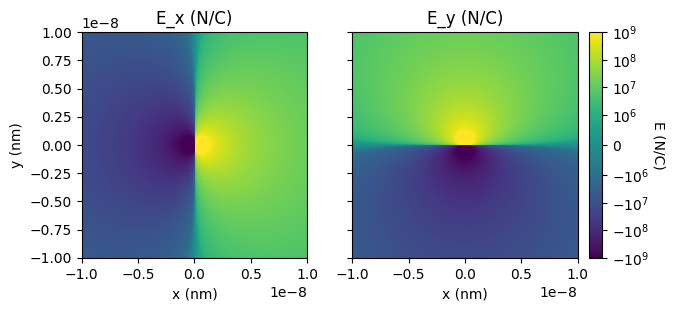

In [13]:

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 2, sharey=True)
norm = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e9, vmax=1e9)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(E_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(E_y_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('E_x (N/C)')
axs[1].set_title('E_y (N/C)')

# Add colorbar to figure
Ecax = inset_axes(
    axs[1], width="6%", height="100%", loc='lower left',
    bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=axs[1].transAxes, borderpad=0
)
E_cbar = plt.colorbar(im_1, cax=Ecax)  
E_cbar.ax.set_ylabel('E (N/C)', rotation=270, labelpad=12)

plt.show()

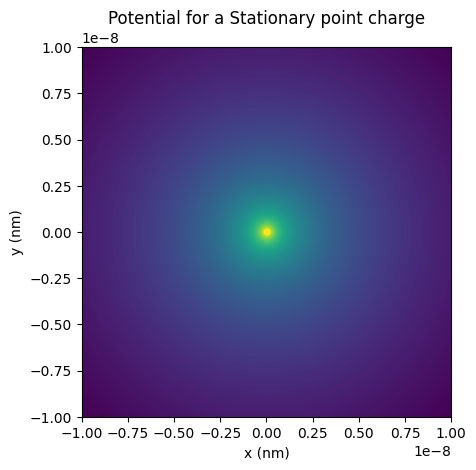

In [21]:
V_plane = V[:, :, 0]  # Create 2D array at z=0 for plotting
fig, ax = plt.subplots()
norm = LogNorm(vmin=1e-1, vmax=1e1)
extent = [-lim, lim, -lim, lim]
ax.set_title('Potential for a Stationary point charge')
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')
im_V = ax.imshow(V_plane.T, origin='lower', norm=norm, extent=extent)
